In [33]:
#importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#loading the dataset
df_2c=pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
df_3c=pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv')

In [12]:
df_3c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [13]:
#concating the df_3c and df_2c
df=pd.concat([df_2c,df_3c],axis=0)

In [15]:
df_2c

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [16]:
y_2c=df_2c['class']
y_3c=df_3c['class']
X=df_2c.drop('class',axis=1)


In [17]:
print(y_2c.unique())

['Abnormal' 'Normal']


In [18]:
print(y_3c.unique())

['Hernia' 'Spondylolisthesis' 'Normal']


In [19]:
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [20]:
scaler=StandardScaler()
scaler.fit_transform(X)

x_train,x_test,y_2c_train,y_2c_test,y_3c_train,y_3c_test=train_test_split(X,y_2c,y_3c,train_size=0.7,random_state=123)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_2c_train.shape)
print(y_3c_test.shape)

(217, 6)
(93, 6)
(217,)
(93,)


In [24]:
#training the model
model_2c=LogisticRegressionCV()
model_2c.fit(x_train,y_2c_train)
model_3c=LogisticRegressionCV()

model_3c.fit(x_train,y_3c_train)
print('Model Trained')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model Trained


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [31]:
y_true_2c=np.array(y_2c_test)
y_pred_2c=model_2c.predict(x_test)
y_true_3c=np.array(y_3c_test)
y_pred_3c=model_3c.predict(x_test)

# Confusion Matrix

In [39]:
labels=['Abnormal','Normal']

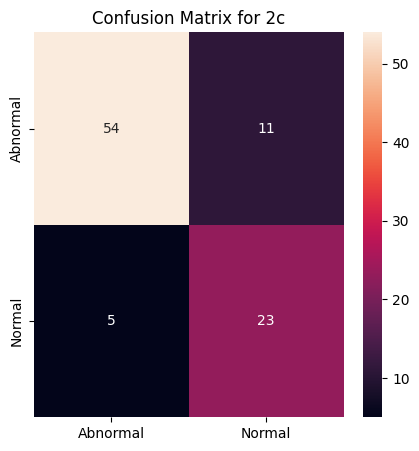

In [40]:
cm=confusion_matrix(y_true_2c,y_pred_2c)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix for 2c')
plt.show()

In [42]:
labels=['Hernia', 'Spondylolisthesis', 'Normal']

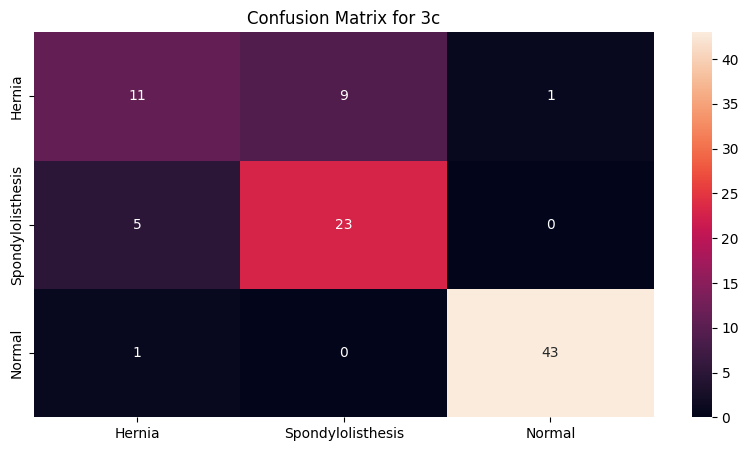

In [46]:
cm=confusion_matrix(y_true_3c,y_pred_3c)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix for 3c')
plt.show()

In [49]:
clr=classification_report(y_2c_test,y_pred_2c)
print(clr)

              precision    recall  f1-score   support

    Abnormal       0.92      0.83      0.87        65
      Normal       0.68      0.82      0.74        28

    accuracy                           0.83        93
   macro avg       0.80      0.83      0.81        93
weighted avg       0.84      0.83      0.83        93



In [50]:
clr=classification_report(y_3c_test,y_pred_3c)
print(clr)

                   precision    recall  f1-score   support

           Hernia       0.65      0.52      0.58        21
           Normal       0.72      0.82      0.77        28
Spondylolisthesis       0.98      0.98      0.98        44

         accuracy                           0.83        93
        macro avg       0.78      0.77      0.77        93
     weighted avg       0.82      0.83      0.82        93

